In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
from keras.datasets.mnist import load_data

In [82]:
(train_data,train_labels),(test_data,test_labels)=load_data()

In [83]:
train_data.shape

(60000, 28, 28)

In [84]:
test_data.shape

(10000, 28, 28)

In [85]:
# Train Data 
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

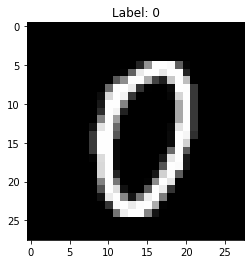

In [86]:
img=train_data[1000]
plt.imshow(img,cmap='gray')
plt.title("Label: %i"%train_labels[1000])
plt.show()

# Image Shape Transformation

In [87]:
# For greyscale image shape must be changed to 28 x 28 x 1
image_height=28
image_width=28

# Gray Scale Image with number of channels = 1 (Rank)
num_channels=1

# Reshaping of Image Handwritten MNIST Data
train_digits=np.reshape(train_data,newshape=(60000,image_height,image_width,num_channels))
test_digits=np.reshape(test_data,newshape=(10000,image_height,image_width,num_channels))

In [88]:
train_digits.shape

(60000, 28, 28, 1)

# Image Pixel Normalization

In [89]:
# scaling of image data
train_digits=train_digits.astype('float32')/255
test_digits=test_digits.astype('float32')/255

In [90]:
# There are 10
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [91]:
from tensorflow.keras.utils import to_categorical
num_classes=10
train_labels_class=to_categorical(train_labels,num_classes)

In [92]:
train_labels_class

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# CNN

In [93]:
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.optimizers import Adam


In [94]:
def build_model():
    model = Sequential()

    # Convolutional Neural Network - I
    # padding='same' : Zero Padding , padding='valid'
    model.add(Conv2D(filters = 32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', 
                     input_shape = (image_height, image_width, num_channels)))
    # MaxPooling
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Conv2D - II
    model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    # MaxPooling
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Conv2D - III
    model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    # MaxPooling
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Flatten Layer
    model.add(Flatten())

    # Fully Connected layer
    model.add(Dense(units = 128, activation='relu'))

    # Output Layer
    # Activation function for multiclass classification = SOFTMAX
    model.add(Dense(units = 10, activation='softmax'))

    optimizers = Adam(learning_rate= 0.0001)

    model.compile(optimizer = optimizers, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [95]:
model=build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [96]:
from keras import callbacks
filepath="E:\Ai\Best_MNIST.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor = 'val_loss', save_best_model = True, mode = 'min', verbose = 1)
checkpoint

In [97]:
import datetime
import keras
import os
logdir = os.path.join("E:\Ai\logs_MNIST", datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = keras.callbacks.TensorBoard(logdir)

In [98]:
history = model.fit(train_digits, train_labels_class, epochs = 15, batch_size= 64, validation_split = 0.1, callbacks = [checkpoint, tensorboard_callback])

Epoch 1/15
844/844 [==============================] - 53s 49ms/step - loss: 0.5555 - accuracy: 0.8486 - val_loss: 0.1373 - val_accuracy: 0.9605

Epoch 00001: saving model to E:\Ai\Best_MNIST.hdf5
Epoch 2/15
844/844 [==============================] - 35s 42ms/step - loss: 0.1363 - accuracy: 0.9595 - val_loss: 0.0858 - val_accuracy: 0.9765

Epoch 00002: saving model to E:\Ai\Best_MNIST.hdf5
Epoch 3/15
844/844 [==============================] - 32s 38ms/step - loss: 0.0964 - accuracy: 0.9700 - val_loss: 0.0705 - val_accuracy: 0.9802

Epoch 00003: saving model to E:\Ai\Best_MNIST.hdf5
Epoch 4/15
844/844 [==============================] - 31s 36ms/step - loss: 0.0778 - accuracy: 0.9758 - val_loss: 0.0648 - val_accuracy: 0.9815

Epoch 00004: saving model to E:\Ai\Best_MNIST.hdf5
Epoch 5/15
844/844 [==============================] - 30s 36ms/step - loss: 0.0673 - accuracy: 0.9791 - val_loss: 0.0610 - val_accuracy: 0.9827

Epoch 00005: saving model to E:\Ai\Best_MNIST.hdf5
Epoch 6/15
844/844 [

In [99]:
predictions = model.predict(test_digits) 

In [100]:
# np.argmax converts categorical o/p into integer o/p
yhat = np.argmax(predictions, axis = 1) 

In [101]:
test_labels_class = to_categorical(test_labels, num_classes)
model.evaluate(test_digits, test_labels_class)

313/313 [==============================] - 2s 6ms/step - loss: 0.0309 - accuracy: 0.9894


[0.030928265303373337, 0.9894000291824341]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, yhat))

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (13,8))
sns.heatmap(confusion_matrix(test_labels, yhat), annot = True, fmt = '0.0f') 